<a href="https://colab.research.google.com/github/subhamdash/deep-learning/blob/master/yolo_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 13229 (delta 1), reused 2 (delta 0), pack-reused 13221
Receiving objects: 100% (13229/13229), 11.92 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (9042/9042), done.


In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!/usr/local/cuda/bin/nvcc --version
!make

In [0]:
!cp /content/drive/My\ Drive/yolov3.weights /content/darknet

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!./darknet detect <path to config> <path to weights> <path to image>

/bin/bash: -c: line 0: syntax error near unexpected token `<'
/bin/bash: -c: line 0: `./darknet detect <path to config> <path to weights> <path to image>'


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

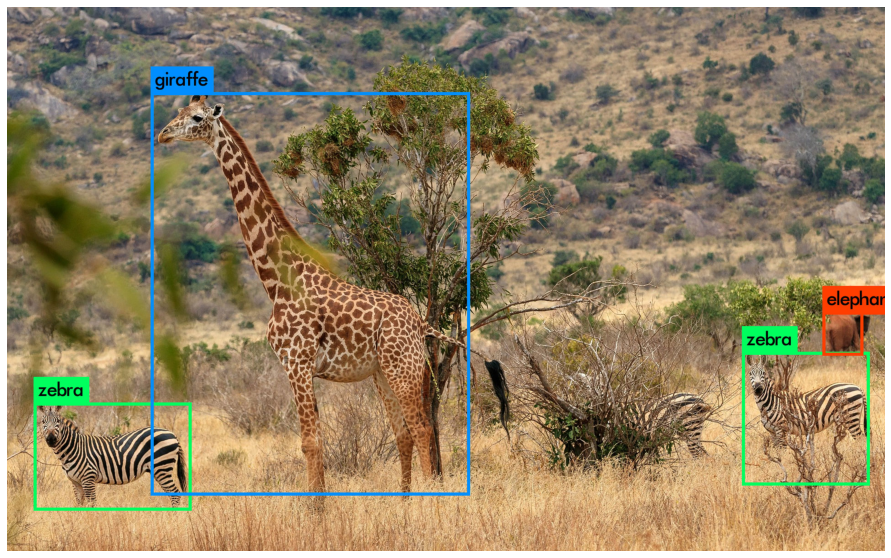

In [59]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/My\ Drive/yolo/images/safari.jpg
imShow('predictions.jpg')

In [0]:
!ls /content/drive/My\ Drive/yolo

darknet-master.zip  obj.zip


In [0]:
!cp /content/drive/My\ Drive/yolo/obj.zip ../

In [0]:
!unzip ../obj.zip -d data/

In [0]:
mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [0]:
!cp /content/drive/My\ Drive/yolo/yolov3/yolov3_custom.cfg ./cfg

In [0]:
!cp /content/drive/My\ Drive/yolo/yolov3/obj.names ./data 

In [0]:
!cp /content/drive/My\ Drive/yolo/yolov3/obj.data ./data 

In [0]:
!cp /content/drive/My\ Drive/yolo/yolov3/generate_train.py ./

In [0]:
!python generate_train.py

In [0]:
!ls data/

428461.jpg  dog.jpg	 horses.jpg		   obj		     person.jpg
9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names


In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-02 11:47:07--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-02 11:47:09--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   501KB/s    in 4m 2s   

2020-05-02 11:51:12 (656 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.400533, GIOU: 0.358130), Class: 0.548940, Obj: 0.036957, No Obj: 0.040759, .5R: 0.250000, .75R: 0.000000, count: 4, class_loss = 4.257035, iou_loss = 1.043340, total_loss = 5.300375 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.442258, GIOU: 0.442257), Class: 0.777489, Obj: 0.002747, No Obj: 0.018542, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 2.370573, iou_loss = 0.267642, total_loss = 2.638216 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.008598, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 1.656846, iou_loss = 0.000000, total_loss = 1.656846 

 215: 3.849509, 4.424753 avg loss, 0.000002 rate, 20.021298 seconds, 13760 images, 37.548229 hours left
Loaded: 0.000038 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.357495, GIOU: 0.320086), Class: 0.50

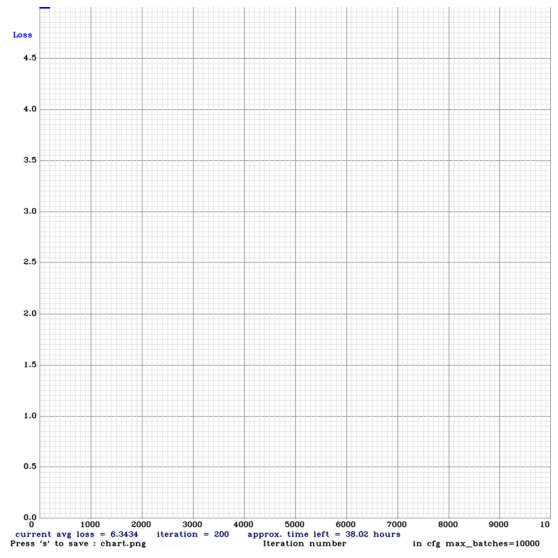

In [0]:
imShow('chart.png')

In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /content/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.287455, GIOU: 0.118559), Class: 0.434087, Obj: 0.060400, No Obj: 0.044987, .5R: 0.000000, .75R: 0.000000, count: 4, class_loss = 3.186135, iou_loss = 2.678656, total_loss = 5.864791 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.020632, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.978873, iou_loss = 0.000000, total_loss = 0.978873 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.009450, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.876099, iou_loss = 0.000000, total_loss = 0.876099 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.256819, GIOU: 0.005954), Class: 0.428222, Obj: 0.049411, No Obj: 0.045189, .5R: 0.000000, .75R: 0.000000, count: 2,

KeyboardInterrupt: ignored

In [0]:
%cd cfg

/content/darknet/cfg


In [0]:
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg

In [0]:
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg

In [0]:
%cd ..

/content/darknet


In [57]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/darknet/backup/yolov3_custom_last.weights /content/drive/My\ Drive/yolo/images/safari.jpg -thresh 0.3



 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

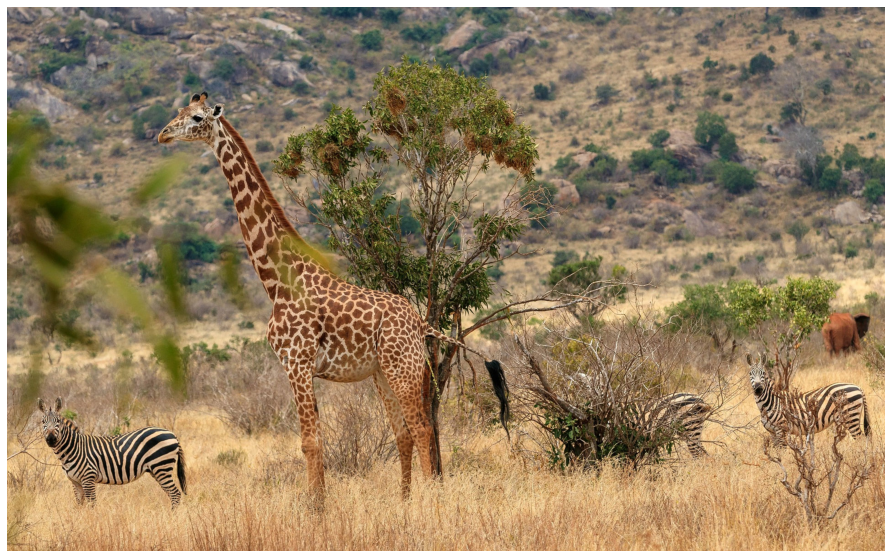

In [58]:
imShow('predictions.jpg')

In [0]:
!cp -r /content/backup /content/drive/My\ Drive/yolo